In this notebook we test Restricted Boltzmann Machines for Honeycomb Heisenberg model

Honeycomb 3x3 has 18 spins and is numerically solvable. We test for 3x3 and then try to approximate for 5x5 honeycomb, which has 50 spins

In [1]:
import jax.numpy as jnp
import netket as nk
import json
import matplotlib.pyplot as plt
from time import time
from pathlib import Path
from Models import RestrictedBoltzmannMachine

In [2]:
import jax
jax.devices()

[CudaDevice(id=0)]

In [3]:
read = False
res_path = Path('./Simulations/6-RBMComparison')
image_path = Path('./images/6-RBMComparison')
extent = [3, 3]
alpha_list = [0.75, 1, 2, 4, 7]
Sz = 0
lr = 0.05
ds = 0.1
n_iter = 1000
n_samples = 800
rbm_results0 = []

In [4]:
honey = nk.graph.Honeycomb(extent=extent, pbc=True)
hilbert = nk.hilbert.Spin(s=1/2, total_sz=Sz, N=honey.n_nodes)
hamiltonian = nk.operator.Heisenberg(hilbert=hilbert, graph=honey, J=1)
eval_gs = nk.exact.lanczos_ed(hamiltonian, k=1, compute_eigenvectors=False)[0]
eval_gs

-40.3886633460195

In [5]:
for alpha in alpha_list:
    honey_path = f'{res_path}/HeisenbergHoneycomb/rbmN{honey.n_nodes}' \
                 f'alpha{alpha}{"Sz0" if Sz == 0 else ""}lr{lr}niter{n_iter}n_samples{n_samples}'
    if not read:
        honey = nk.graph.Honeycomb(extent=extent, pbc=True)
        hilbert = nk.hilbert.Spin(s=1/2, total_sz=Sz, N=honey.n_nodes)
        hamiltonian = nk.operator.Heisenberg(hilbert=hilbert, graph=honey, J=1)
        sampler = nk.sampler.MetropolisExchange(hilbert=hilbert, graph=honey)
        optimizer = nk.optimizer.Sgd(learning_rate=lr)
        sr = nk.optimizer.SR(diag_shift=ds)
        rbm = RestrictedBoltzmannMachine(alpha=alpha, param_dtype=jnp.float32)
        vstate = nk.vqs.MCState(sampler, rbm, n_samples=n_samples)
        gs = nk.VMC(hamiltonian=hamiltonian, optimizer=optimizer, 
                    preconditioner=sr, variational_state=vstate)
        
        start = time()
        gs.run(n_iter=n_iter, out=honey_path)
        print(f'Time: {(t := time()-start):.3f} seconds')
        rbm_result = json.load(open(f'{honey_path}.log'))
        rbm_result['time'] = t
        if eval_gs is not None:
            rbm_result['gs'] = float(eval_gs)
        json.dump(rbm_result, open(f'{honey_path}.log', 'w'))
        rbm_results0.append(rbm_result)
    else:
        rbm_results0.append(json.load(open(f'{honey_path}.log')))

  0%|          | 0/1000 [00:00<?, ?it/s]

Time: 119.962 seconds


  0%|          | 0/1000 [00:00<?, ?it/s]

Time: 125.266 seconds


  0%|          | 0/1000 [00:00<?, ?it/s]

Time: 142.029 seconds


  0%|          | 0/1000 [00:00<?, ?it/s]

Time: 149.855 seconds


  0%|          | 0/1000 [00:00<?, ?it/s]

Time: 151.632 seconds


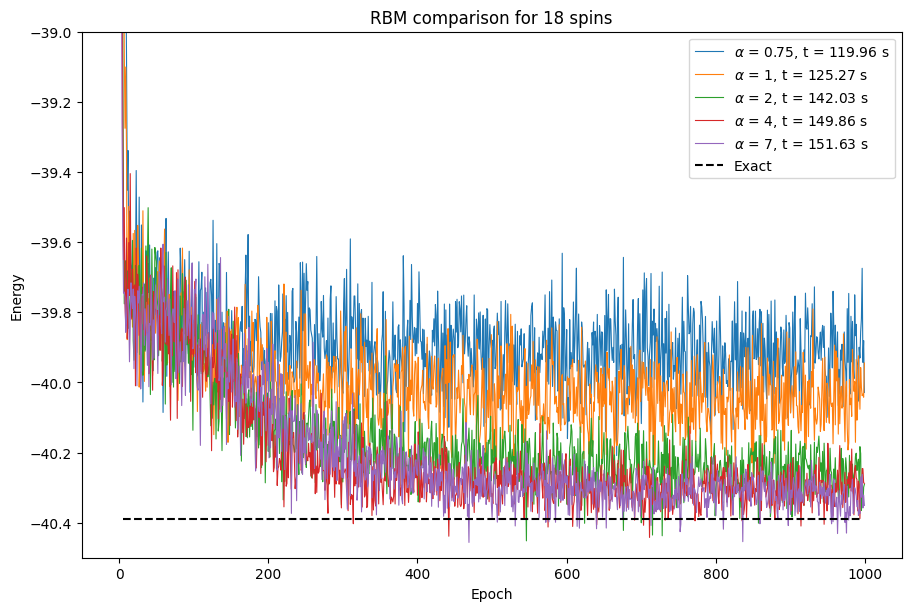

In [6]:
#37, 41, 66, 103, biggest one 165 secs
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(9, 6))
for rbm_res, alpha in zip(rbm_results0, alpha_list):
    axes.plot(rbm_res['Energy']['iters'], rbm_res['Energy']['Mean'], linewidth=0.8,
              label=f'$\\alpha$ = {alpha}, t = {rbm_res["time"]:.2f} s')
if eval_gs is not None: 
    axes.axhline(y=eval_gs, xmin=0.05, xmax=0.95, 
                 color='black', linestyle='--', label='Exact')
axes.set(xlabel='Epoch', ylabel='Energy', ylim=[-40.5, -39],
         title=f'RBM comparison for {honey.n_nodes} spins')
axes.legend()
figure.savefig(image_path / f'Honeycomb{extent}Iter{n_iter}Samples{n_samples}.png');

In [7]:
read = False
extent = [5, 5]
eval_gs = None
Sz = 0
lr = 0.05
ds = 0.1
n_iter = 5000
n_samples = 1600
rbm_results1 = []

In [8]:
for alpha in alpha_list:
    honey_path = f'{res_path}/HeisenbergHoneycomb/rbmN{honey.n_nodes}' \
                 f'alpha{alpha}{"Sz0" if Sz == 0 else ""}lr{lr}niter{n_iter}n_samples{n_samples}'
    if not read:
        honey = nk.graph.Honeycomb(extent=extent, pbc=True)
        hilbert = nk.hilbert.Spin(s=1/2, total_sz=Sz, N=honey.n_nodes)
        hamiltonian = nk.operator.Heisenberg(hilbert=hilbert, graph=honey, J=1)
        sampler = nk.sampler.MetropolisExchange(hilbert=hilbert, graph=honey)
        optimizer = nk.optimizer.Sgd(learning_rate=lr)
        sr = nk.optimizer.SR(diag_shift=ds)
        rbm = RestrictedBoltzmannMachine(alpha=alpha, param_dtype=jnp.float32)
        vstate = nk.vqs.MCState(sampler, rbm, n_samples=n_samples)
        gs = nk.VMC(hamiltonian=hamiltonian, optimizer=optimizer, 
                    preconditioner=sr, variational_state=vstate)
        
        start = time()
        gs.run(n_iter=n_iter, out=honey_path)
        print(f'Time: {(t := time()-start):.3f} seconds')
        rbm_result = json.load(open(f'{honey_path}.log'))
        rbm_result['time'] = t
        if eval_gs is not None:
            rbm_result['gs'] = float(eval_gs)
        json.dump(rbm_result, open(f'{honey_path}.log', 'w'))
        rbm_results1.append(rbm_result)
    else:
        rbm_results1.append(json.load(open(f'{honey_path}.log')))

  0%|          | 0/5000 [00:00<?, ?it/s]

KeyboardInterrupt: 

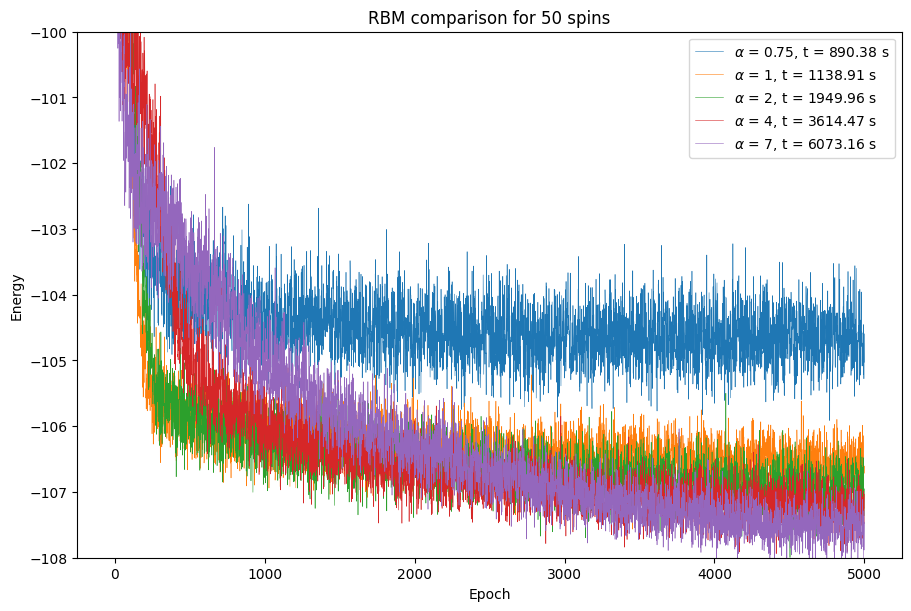

In [17]:
#890, 1128, 1949, 3614, 6000
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(9, 6))
for rbm_res, alpha in zip(rbm_results1, alpha_list):
    axes.plot(rbm_res['Energy']['iters'], rbm_res['Energy']['Mean'], linewidth=0.4,
              label=f'$\\alpha$ = {alpha}, t = {rbm_res["time"]:.2f} s')
if eval_gs is not None: 
    axes.axhline(y=eval_gs, xmin=0.05, xmax=0.95,
                 color='black', linestyle='--', label='Exact')
axes.set(xlabel='Epoch', ylabel='Energy', ylim=[-108, -100],
         title=f'RBM comparison for {honey.n_nodes} spins')
axes.legend()
figure.savefig(image_path / f'Honeycomb{extent}Iter{n_iter}Samples{n_samples}.png');